<a href="https://colab.research.google.com/github/Spin-Chemistry-Labs/radicalpy/blob/187-google-colab-tutorials/examples/tutorials/07_introduction_to_CIDNP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Tutorial 7 - Introduction to CIDNP and NMR



&copy; Lewis M. Antill, 2025

This tutorial aims to...

In [ ]:
!pip install radicalpy

In [5]:
import matplotlib.pyplot as plt
import numpy as np

from radicalpy.experiments import cidnp, nmr

---

### Nuclear Magnetic Resonance

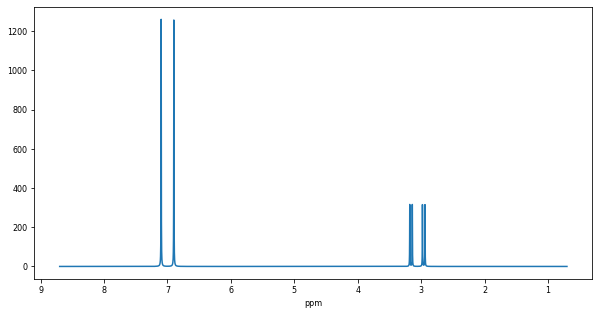

In [6]:
MULTIPLETS = [
    (2.0, 800.0, 2, 0),  # 2 doublets @ 800 Hz
    (2.0, 900.0, 2, 0),  # 2 doublets @ 900 Hz
    (1.0, 2870.0, 2, 20),  # doublet @ 2870 Hz, J=20 Hz
    (1.0, 2770.0, 2, 20),  # doublet @ 2770 Hz, J=20 Hz
]
SW_HZ = 4000.0  # spectral width (Hz)
NP = 8000  # acquired points
N_FFT = 16000  # zero-filled FFT length
TRANS_MHZ = 500.0  # transmitter frequency (MHz)
CARRIER_PPM = 4.7  # carrier position (ppm)
LINEWIDTH_HZ = 2.0  # Lorentzian linewidth (Hz)
SCALE = 1.0  # final y-scale

ppm, spectrum = nmr(
    multiplets=MULTIPLETS,
    spectral_width=SW_HZ,
    number_of_points=NP,
    fft_number=N_FFT,
    transmitter_frequency=TRANS_MHZ,
    carrier_position=CARRIER_PPM,
    linewidth=LINEWIDTH_HZ,
    scale=SCALE,
)

plt.plot(ppm, spectrum.real)
plt.gca().invert_xaxis()
plt.xlabel("ppm", size=8)
plt.tick_params(labelsize=8)
plt.gcf().set_size_inches(10, 5)
plt.show()

---

### Chemically Induced Dynamic Nuclear Polarisation

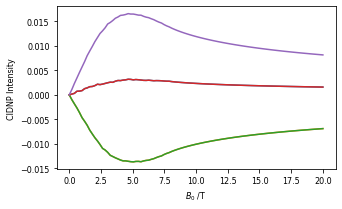

In [7]:
Bmax=20.0
dB=100
deltag = 2.0041 - 2.0036
Bs = np.linspace(0.0, Bmax, dB)
ks = 5e8  # s^-1
alpha = 1.5
model = "c"
donor_hfcs_spinhalf = [0.15, -0.65, -0.65, 0.15, 0.77]
acceptor_hfcs_spinhalf = [0.390, -0.769, -0.17, 0.24]
donor_hfcs_spin1 = []
acceptor_hfcs_spin1 = []

for i in range(1, 6):
    B0, p = cidnp(
        B0=Bs,
        deltag=deltag,
        cidnp_model=model,
        ks=ks,
        alpha=alpha,
        nucleus_of_interest=i,
        donor_hfc_spinhalf=donor_hfcs_spinhalf,
        acceptor_hfc_spinhalf=acceptor_hfcs_spinhalf,
        donor_hfc_spin1=donor_hfcs_spin1,
        acceptor_hfc_spin1=acceptor_hfcs_spin1,
    )
    plt.plot(B0, p)

plt.xlabel("$B_0$ /T", size=8)
plt.ylabel("CIDNP Intensity", size=8)
plt.tick_params(labelsize=8)
plt.gcf().set_size_inches(5, 3)
plt.show()